### Performing One sample test in R

http://www.sthda.com/english/wiki/one-sample-t-test-in-r    
http://www.instantr.com/2012/12/29/performing-a-one-sample-t-test-in-r/

In [33]:
install.packages(c("ggplot2", "ggpubr", "plyr"))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


https://www.rdocumentation.org/packages/plyr/versions/1.8.4

https://www.rdocumentation.org/packages/readxl/versions/0.1.1

In [1]:
library(ggplot2)
library(plyr)
library(ggpubr)

Loading required package: magrittr

Attaching package: ‘ggpubr’

The following object is masked from ‘package:plyr’:

    mutate



In [9]:
options(repr.plot.width = 6, repr.plot.height = 5)

In [10]:
auto_mobile <- read.csv("datasets/auto_mobiles_processed.csv", header = TRUE)

head(auto_mobile, 10)

normalized_losses,fuel_type,aspiration,number_of_doors,drive_wheels,engine_location,wheel_base,length,width,height,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
168,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
168,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
168,gas,std,two,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
164,gas,std,four,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
164,gas,std,four,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
161,gas,std,two,fwd,front,99.8,177.3,66.3,53.1,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
158,gas,std,four,fwd,front,105.8,192.7,71.4,55.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
168,gas,std,four,fwd,front,105.8,192.7,71.4,55.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
158,gas,turbo,four,fwd,front,105.8,192.7,71.4,55.9,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
192,gas,std,two,rwd,front,101.2,176.8,64.8,54.3,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [11]:
dim(auto_mobile)

[1] 187  23

### About one sample t-test
A one-sample t-test is used to compare the mean value of a sample with a constant value denoted μ0. The test has the null hypothesis that the population mean is equal to μ0 and the alternative hypothesis that it is not equal to μ0.

### Computing one-sample t-test manually

Here we are taking less than 30 datapoints

Set seed is same like random_int in python.

In [13]:
set.seed =(1000)

price_subset <- sample(auto_mobile$price, 29)

price_subset

[1]  5348 12170  9549  8495  5572 11549  7299 10945  8921  9495 15040  9279
[13]  7126  7129 19699  8249 15690 10595  5389 12964 14489  6488 11199  8058
[25]  7395 11900  6695  7995  7295

##### Since the sample size is not large enough (less than 30), we need to check whether the data follow a normal distribution.

### Shapiro-Wilk test:
* Null hypothesis: the data are normally distributed
* Alternative hypothesis: the data are not normally distributed

In [14]:
shapiro.test(price_subset)


	Shapiro-Wilk normality test

data:  price_subset
W = 0.91884, p-value = 0.0285


##### Since the p-value is less than 0.05 that means the data is not normally distributed so we have to use alternate hypothesis

#### Visual inspection of the data normality using Q-Q plots (quantile-quantile plots). Q-Q plot draws the correlation between a given sample and the normal distribution

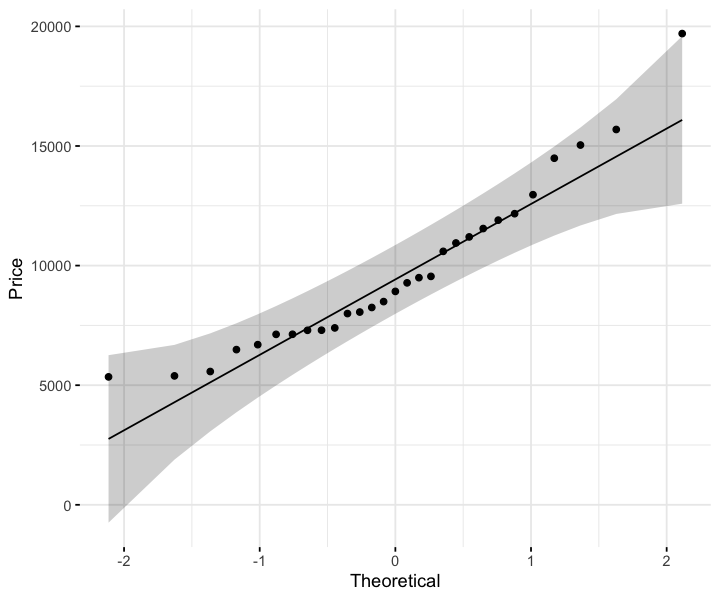

In [15]:
ggqqplot(price_subset, ylab = "Price",
         ggtheme = theme_minimal())

In [16]:
actual_mean <- mean(price_subset)

actual_mean

[1] 9724.724

In [17]:
std <- sd(price_subset)

std

[1] 3437.83

In [18]:
len_data <- length(price_subset)

len_data 

[1] 29

In [19]:
std_error <- std / sqrt(price_subset)

std_error[1:10]

[1] 47.00983 31.16298 35.18077 37.29947 46.05521 31.98985 40.23951 32.86067
 [9] 36.39800 35.28067

#### set mu value to 1000

In [20]:
mu = 1000

In [21]:
t_statistic <- (actual_mean - mu) / (std / sqrt(len_data))

t_statistic

[1] 13.66679

In [22]:
p_value <- 2 * pt(t_statistic, df = len_data - 1, lower = F)

p_value

[1] 6.530406e-14

#### Checking the p_value condition whether we should do null hypothesis or alternative hypothesis

In [23]:
if (p_value <= 0.05) {
    'Mean of sample not equal to 1000 (alternative hypotheses)' 
} else { 
    'Mean of sample is equal to 1000 (null hypotheses)'
}

[1] "Mean of sample not equal to 1000 (alternative hypotheses)"

### Find t-test by the help of t.test function 

https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/t.test

In [24]:
summary(price_subset)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5348    7295    8921    9725   11549   19699 

In [25]:
t_test <- t.test(price_subset, mu = mu, alternative = "two.sided")

t_test


	One Sample t-test

data:  price_subset
t = 13.667, df = 28, p-value = 6.53e-14
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  8417.044 11032.405
sample estimates:
mean of x 
 9724.724 


##### The p-value of the test is less than the significance level alpha = 0.05. We can conclude that the mean price of the car is significantly different from 1000 with the p-value it had calculated.

In [26]:
names(t_test)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

In [27]:
t_test$statistic

t 
13.66679

In [28]:
t_test$p.value

[1] 6.530406e-14

In [29]:
t_test$stderr

[1] 638.3889

In [30]:
t_test$conf.int

[1]  8417.044 11032.405
attr(,"conf.level")
[1] 0.95

In [31]:
t_test$estimate

mean of x 
 9724.724

In [32]:
t_test$method

[1] "One Sample t-test"

### Z-test

https://www.rdocumentation.org/packages/BSDA/versions/1.2.0/topics/z.test

Here we will take all the datapoints

In [32]:
install.packages(c("pastecs", "TeachingDemos"))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [33]:
library(TeachingDemos)
library(pastecs)


Attaching package: ‘pastecs’

The following object is masked from ‘package:magrittr’:

    extract



In [34]:
nrow(auto_mobile)

[1] 187

In [35]:
shapiro.test(auto_mobile$price)


	Shapiro-Wilk normality test

data:  auto_mobile$price
W = 0.90311, p-value = 1.045e-09


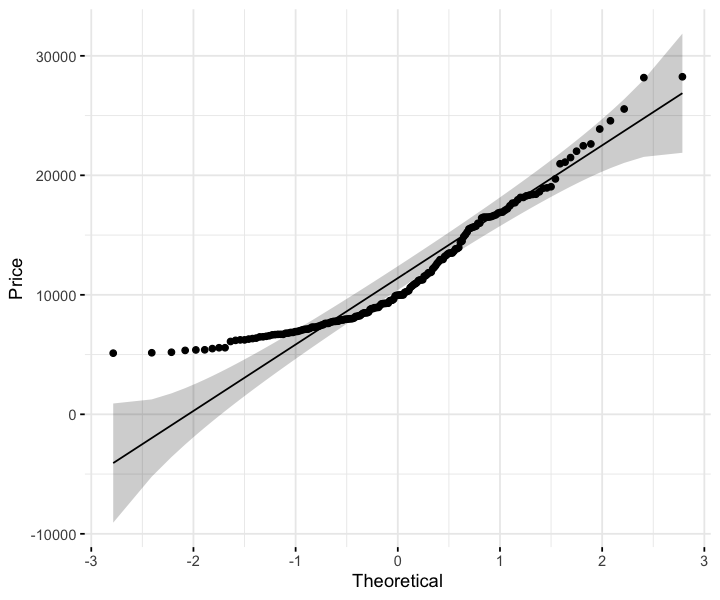

In [36]:
ggqqplot(auto_mobile$price, ylab = "Price",
         ggtheme = theme_minimal())

In [37]:
z_actual_mean <- mean(auto_mobile$price)

z_actual_mean

[1] 11503.18

In [38]:
z_std <- sd(auto_mobile$price)

z_std

[1] 4979.407

In [39]:
z_len_data <- length(auto_mobile$price)

z_len_data 

[1] 187

In [40]:
z_std_error <- z_std / sqrt(z_len_data)

z_std_error

[1] 364.1303

In [41]:
mu

[1] 1000

In [42]:
z_statistic <- (z_actual_mean - mu) / (z_std / sqrt(z_len_data))

z_statistic

[1] 28.84456

In [43]:
p_value <- 2 * pnorm(-abs(z_statistic))

p_value

[1] 5.929346e-183

In [44]:
if (p_value <= 0.05) {
    'Mean of sample not equal to 1000 (alternative hypotheses)' 
} else { 
    'Mean of sample is equal to 1000 (null hypotheses)'
}

[1] "Mean of sample not equal to 1000 (alternative hypotheses)"

In [45]:
z_test <- z.test(auto_mobile$price, mu = mu, stdev = z_std)

z_test


	One Sample z-test

data:  auto_mobile$price
z = 28.845, n = 187.00, Std. Dev. = 4979.41, Std. Dev. of the sample
mean = 364.13, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
 10789.49 12216.86
sample estimates:
mean of auto_mobile$price 
                 11503.18 


##### The p-value of the test is less than the significance level alpha = 0.05. We can conclude that the mean price of the car is significantly different from 1000 with the p-value it had calculated.

In [46]:
names(z_test)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
[6] "null.value"  "alternative" "method"      "data.name"

##### Showing what type of z-test was performed

In [47]:
z_test$method

[1] "One Sample z-test"

##### Showing data

In [48]:
z_test$data.name

[1] "auto_mobile$price"

##### Showing value of t-statistic

In [49]:
z_test$statistic

z 
28.84456

In [50]:
z_test$parameter

n                    Std. Dev. 
                    187.0000                    4979.4065 
Std. Dev. of the sample mean 
                    364.1303

In [51]:
z_test$p.value

[1] 5.929346e-183

In [52]:
z_test$conf.int

[1] 10789.49 12216.86
attr(,"conf.level")
[1] 0.95

In [53]:
z_test$estimate

mean of auto_mobile$price 
                 11503.18